In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import numpy as np
import json
import datetime
import scipy
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
from pylab import plot, title, show , legend

import plotly
from plotly.graph_objs import Scatter, Layout

In [2]:
def GroupColFunc(row):
    week = datetime.date(row['Year'], row['Month'], row['DayofMonth']).isocalendar()[1]
    if (row['Month'] == 1 and week > 50):
        return 1.0
    else:
        if (row['Month'] == 12 and week == 1):
            return 53.0
        else:
            return week

In [3]:
def GenerateDataWithWeeks(years):
    for year in years:
        df = pd.read_csv(year+'.csv')
        woyserie = df.apply(lambda row: GroupColFunc(row), axis=1)
        df = df.assign(WeekOfYear= woyserie)
        df.to_csv(year+'wy.csv')

In [4]:
def plotCancellationCodesBy(df, index):  
    # (A = carrier, B = weather, C = NAS, D = security)
    var = df[df.Cancelled > 0].groupby([index,'CancellationCode'])[index].count() / df.groupby([index])[index].count()
    var.unstack().plot(kind='bar',stacked=True, color=['red','blue','green','pink'], grid=False)
    plt.show()

In [5]:
years = ['2003','2004','2005','2006','2007','2008']


# totalM = pd.Series()
# cancelledM = pd.Series()
# cancelledAM = pd.Series()
# cancelledBM = pd.Series()
# cancelledCM = pd.Series()
# cancelledDM = pd.Series()
# delayM = pd.Series()
# delayCM = pd.Series()
# delaywM = pd.Series()
# delayNM = pd.Series()
# delaySM = pd.Series()
# delayLM = pd.Series()
aer = pd.Series()

for year in years:
    df = pd.read_csv(year+'.csv')
    #_Vuelos Totales Por Mes 
#     ser = df.groupby(['Year','Month'])['Month'].count()
#     totalM = totalM.append(ser)
#     #_Cancelados Por Mes 
#     ser = df[df.Cancelled > 0].groupby(['Year','Month'])['Month'].count()
#     cancelledM = cancelledM.append(ser)
#     #_Cancelados Aerolinea Por Mes 
#     ser = df[df.CancellationCode == 'A'].groupby(['Year','Month'])['Month'].count()
#     cancelledAM = cancelledAM.append(ser)
#     #_Cancelados Mal Tiempo Por Mes 
#     ser = df[df.CancellationCode == 'B'].groupby(['Year','Month'])['Month'].count()
#     cancelledBM = cancelledBM.append(ser)    
#         #_Cancelados Mal Tiempo Por Mes 
#     ser = df[df.CancellationCode == 'C'].groupby(['Year','Month'])['Month'].count()
#     cancelledCM = cancelledCM.append(ser)    
#         #_Cancelados Mal Tiempo Por Mes 
#     ser = df[df.CancellationCode == 'D'].groupby(['Year','Month'])['Month'].count()
#     cancelledDM = cancelledDM.append(ser)    
#     # Delay Por Mes
#     ser = df[(df.CarrierDelay > 0) | (df.WeatherDelay > 0) | (df.NASDelay > 0) | (df.SecurityDelay > 0) | (df.LateAircraftDelay > 0)].groupby(['Year','Month'])['Month'].count()
#     delayM = delayM.append(ser)
#     # Carrier Delay Por Mes
#     ser = df[df.CarrierDelay > 0].groupby(['Year','Month'])['Month'].count()
#     delayCM = delayCM.append(ser)
#     # Mal Tiempo Delay Por Mes
#     ser = df[df.WeatherDelay > 0].groupby(['Year','Month'])['Month'].count()
#     delaywM = delaywM.append(ser)
#     # Nas Delay Por Mes
#     ser = df[df.NASDelay > 0].groupby(['Year','Month'])['Month'].count()
#     delayNM = delayNM.append(ser)
#     # Security Delay Por Mes 
#     ser = df[df.SecurityDelay > 0].groupby(['Year','Month'])['Month'].count()
#     delaySM = delaySM.append(ser)
#     # LateAircraft Delay Por Mes
#     ser = df[df.LateAircraftDelay > 0].groupby(['Year','Month'])['Month'].count()
#     delayLM = delayLM.append(ser)
    # Aeropuerto JFK
    ser = df[(df.Origin == 'JFK') | (df.Dest == 'JFK')].groupby(['Year','Month'])['Month'].count()
    aer = aer.append(ser)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
aer

(2003, 1)     13320
(2003, 2)     12066
(2003, 3)     13715
(2003, 4)     13068
(2003, 5)     11550
(2003, 6)     11560
(2003, 7)     12406
(2003, 8)     12453
(2003, 9)     11621
(2003, 10)    12251
(2003, 11)    12014
(2003, 12)    12995
(2004, 1)     13631
(2004, 2)     13151
(2004, 3)     14129
(2004, 4)     14498
(2004, 5)     14569
(2004, 6)     15101
(2004, 7)     16619
(2004, 8)     17325
(2004, 9)     15681
(2004, 10)    16263
(2004, 11)    15610
(2004, 12)    16432
(2005, 1)     16204
(2005, 2)     14905
(2005, 3)     17180
(2005, 4)     16847
(2005, 5)     17226
(2005, 6)     17205
              ...  
(2006, 7)     19360
(2006, 8)     19918
(2006, 9)     19259
(2006, 10)    20594
(2006, 11)    20183
(2006, 12)    21060
(2007, 1)     20981
(2007, 2)     19301
(2007, 3)     22011
(2007, 4)     21328
(2007, 5)     21128
(2007, 6)     20979
(2007, 7)     21964
(2007, 8)     22132
(2007, 9)     20455
(2007, 10)    20970
(2007, 11)    20606
(2007, 12)    20849
(2008, 1)     20062


In [7]:
def lineal(x, a, b):
    return a + b*x
def nachooriginal(x, a, b, c, d, e, f, g):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e
def nacho(x, a, b, c, d, e, f, g, h, i, j):
    return h*(x**4) + i*(x**3) + j*(x**2) + a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e
def cua(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + f * np.cos(x) + g * np.sin(x) + d * np.log(x+1) + e + k * np.sin(x) ** 2 + l * np.cos(x) ** 2 

def biz(x, a, b, c, d, e, f, g, h):
    return a*x + b * abs(np.cos(x)) + c * abs(np.sin(x)) + d * np.cos(x) + e * np.sin(x) + f * np.cos(x) + g * np.sin(x)  + h

def definitiva(x, a, b, c, d, e, f, g, h):
    return a + b * x + c * np.cos(x*d+e) + f * np.sin(x*g+h) + c * np.cos(x*d+e) + f * np.sin(x*g+h)


# Vuelos entrenado 2003-2006

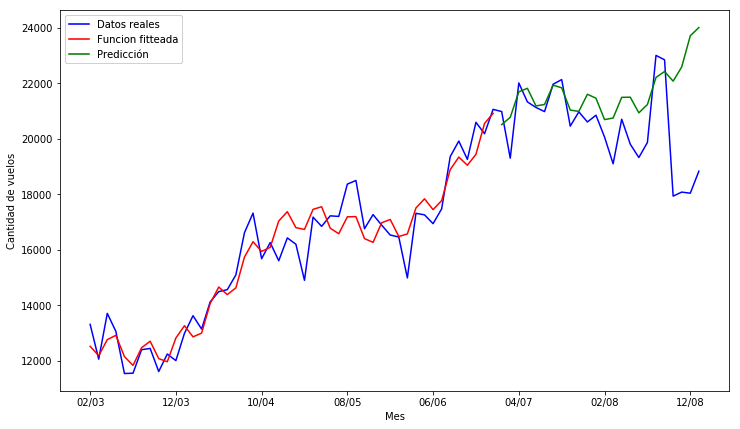

1892582.00557633

In [12]:
train_y = (aer).values[0:48]
train_x = np.arange(0, train_y.size, 1)
fit_y = aer.values
fit_x = np.arange(0, fit_y.size, 1) 

fun = definitiva
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)

plt.figure(figsize=(12,7))
# Datos
data_plt, = plt.plot(fit_x, fit_y, 'b-', label='Datos reales')

# Entrenamiento
fit_plt, = plt.plot(fit_x[0:48], y_pred[0:48], 'r-', label='Funcion fitteada')

# Prediccion
pred_plt, = plt.plot(fit_x[48:72], y_pred[48:72], 'g-', label='Predicción')

# Leyendas
legend = plt.legend(handles=[data_plt, fit_plt, pred_plt], loc=0)
ax = plt.gca().add_artist(legend)

# Labels eje X
def formatter_fun(x, p):
    month = 1 + x
    year = int(2003 + month / 12)
    month = int(month % 12 + 1)
    dat = datetime.date(year,month,1)
    return dat.strftime("%m/%y")

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(formatter_fun))
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')

plt.show()
np.mean((fit_y - y_pred)**2) ##Error

# Vuelos entrenado multiples

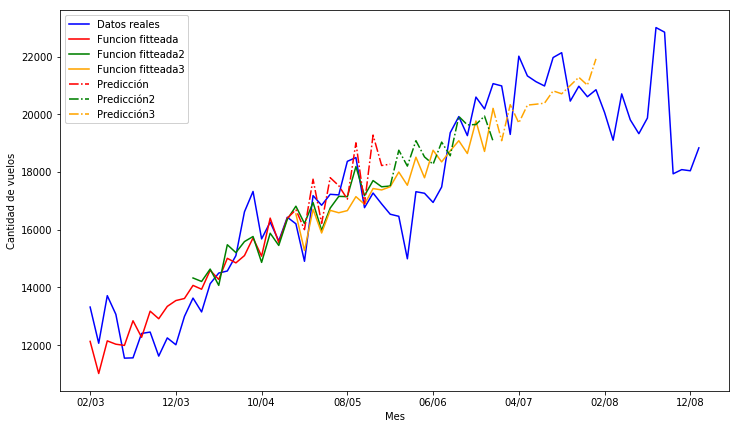

945226.934968
1215735.60396
1242731.95726


In [13]:
fun = definitiva
data_y = aer.values
data_x = np.arange(0, data_y.size, 1) 
#EXP1
train_y = data_y[0:24]
train_x = data_x[0:24]
fit_y = data_y[0:36]
fit_x = data_x[0:36]
popt, pcov = optimize.curve_fit(fun, train_x, train_y)
y_pred = fun(fit_x, *popt)

#EXP2
train_y2 = data_y[12:36]
train_x2 = data_x[12:36]
fit_y2 = data_y[12:48]
fit_x2 = data_x[12:48]
popt2, pcov2 = optimize.curve_fit(fun, train_x2, train_y2)
y_pred2 = fun(fit_x2, *popt2)

#EXP3
train_y3 = data_y[24:48]
train_x3 = data_x[24:48]
fit_y3 = data_y[24:60]
fit_x3 = data_x[24:60]
popt3, pcov3 = optimize.curve_fit(fun, train_x3, train_y3)
y_pred3 = fun(fit_x3, *popt3)

#PLOT
plt.figure(figsize=(12,7))

# Datos
data_plt, = plt.plot(data_x, data_y, 'b-', label='Datos reales')

# Entrenamiento
fit_plt, = plt.plot(fit_x[0:24], y_pred[0:24], 'r-', label='Funcion fitteada')
fit_plt2, = plt.plot(fit_x2[0:24], y_pred2[0:24], 'g-', label='Funcion fitteada2')
fit_plt3, = plt.plot(fit_x3[0:24], y_pred3[0:24], '-', label='Funcion fitteada3', color="orange")

# Prediccion
pred_plt, = plt.plot(fit_x[23:36], y_pred[23:36], 'r-.', label='Predicción')
pred_plt2, = plt.plot(fit_x2[23:36], y_pred2[23:36], 'g-.', label='Predicción2')
pred_plt3, = plt.plot(fit_x3[23:36], y_pred3[23:36], '-.', label='Predicción3', color="orange")

# Leyendas
legend = plt.legend(handles=[data_plt, fit_plt, fit_plt2, fit_plt3, pred_plt, pred_plt2, pred_plt3], loc=2)
ax = plt.gca().add_artist(legend)

# Labels eje X
def formatter_fun(x, p):
    month = 1 + x
    year = int(2003 + month / 12)
    month = int(month % 12 + 1)
    dat = datetime.date(year,month,1)
    return dat.strftime("%m/%y")

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(formatter_fun))
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')

plt.show()
print(np.mean((fit_y - y_pred)**2))
print(np.mean((fit_y2 - y_pred2)**2))
print(np.mean((fit_y3 - y_pred3)**2)) ##Error

# Experimento ECMs

In [10]:
funciones = [lineal, nachooriginal, nacho, cua, biz, la]
ecms = []
for fun in funciones:
    train_y = (aer).values[0:48]
    train_x = np.arange(0, train_y.size, 1)
    fit_y = aer.values
    fit_x = np.arange(0, fit_y.size, 1) 

    popt, pcov = optimize.curve_fit(fun, train_x, train_y)
    y_pred = fun(fit_x, *popt)

    ecms.append(np.mean((fit_y - y_pred)**2)) ##Error
ecms

NameError: name 'la' is not defined

In [ ]:
funciones = [lineal, tarrioOriginal, tarrio, cua, biz, la]
ecms = []
for fun in funciones:
    train_y = (totalM).values[0:48]
    train_x = np.arange(0, train_y.size, 1)
    fit_y = totalM.values
    fit_x = np.arange(0, fit_y.size, 1) 

    popt, pcov = optimize.curve_fit(fun, train_x, train_y)
    y_pred = fun(fit_x, *popt)

plt.show()
print(np.mean((fit_y - y_pred)**2)) ##Error